In [0]:
# dataflameをwebに組み込むための前処理
df_1 = pd.read_csv('./beers.csv', dtype={'style': 'category'}, index_col=0))
df_1['abv'] = df_1['abv'] * 100

df_2 = pd.read_csv('./breweries.csv')
df_2 = df_2.rename(columns={'Unnamed: 0': 'brewery_id', 'name': 'brewery_name'})

df = pd.merge(df_1, df_2, on='brewery_id', how='inner')
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('brewery_id', axis=1)
df = df.drop('id', axis=1)
df = df.drop('state', axis=1)
df = df.dropna()
df.insert(loc=4, column='style_id', value=df['style'].cat.codes)

# 中身が4個以下のクラス(style_id)のモノを全削除
df = df.drop([1, 1098, 190, 361, 507, 850, 1351, 290, 400, 761, 1077, 1191,133,1122,1187])
df = df.drop([1334,1337,368,372,510,644,676,703,923,1245,1295,1329,121,343,827,927,1118,1125,1249,1274,1349,1369])
df = df.drop([15,26,39,181,197,362,391,567,1091,1126,1175,1188,1190,1199,1401,10,24,25,78,82,109,154,192,208,302,333,349,401])
df = df.drop([408,425,434,452,558,563,565,574,596,646,649,677,709,764,904,939,994,1003,1083,1105,1137,1153,1161,1335,1370,1397])
df = df.drop([634,636,637,638,795,846,847,848,905,912,1045,1057,1166,1206,1211]) 
df = df.drop([103,120,123,239,312,509,655,719,788,803,815,1103,1227,1324,1346])

#counts = df['style_id'].value_counts()
#counts
#dfunko = df[(df['style_id']==32) | (df['style_id']==85) | (df['style_id']==65) | (df['style_id']==81) | (df['style_id']==50)]
#dfunko['Unnamed: 0']

# dataflameのpickle化
df = df.reset_index(drop=True)
df.to_pickle('beer_df.pkl')

In [0]:
import pandas as pd
import warnings
# 不要な警告文除去
warnings.filterwarnings("ignore")
# PyCaretを読み込み
from pycaret.classification import *

In [0]:
# モデル学習用の前処理、setup()がデータ分割も含む

# 説明変数
X = df.loc[:, ['abv', 'ibu']]
# 目的変数
y = df['style_id']
df = pd.concat([X,y], axis=1)
exp1 = setup(df, target = 'style_id')

In [49]:
# アルゴリズムを同時に評価
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.442600,0.000000,0.242900,0.404100,0.411600,0.382200
1,Light Gradient Boosting Machine,0.438200,0.000000,0.233000,0.391700,0.404000,0.377000
2,Gradient Boosting Classifier,0.434800,0.000000,0.229800,0.392200,0.403400,0.373700
3,Extreme Gradient Boosting,0.434800,0.000000,0.197100,0.344800,0.373700,0.363800
4,Extra Trees Classifier,0.424800,0.000000,0.225900,0.402300,0.403100,0.366000
5,Random Forest Classifier,0.421400,0.000000,0.226900,0.393600,0.396700,0.361700
6,Ada Boost Classifier,0.419200,0.000000,0.207200,0.352500,0.375200,0.350000
7,Naive Bayes,0.404700,0.000000,0.125900,0.281200,0.322100,0.325500
8,Decision Tree Classifier,0.396800,0.000000,0.218800,0.412200,0.391600,0.342700
9,K Neighbors Classifier,0.385800,0.000000,0.166100,0.344600,0.351900,0.319900


In [50]:
# CatboostClassifierでモデルを作成
rf = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.4333,0.0,0.2687,0.4065,0.4094,0.3747
1,0.3889,0.0,0.1669,0.3012,0.3324,0.3220
2,0.4333,0.0,0.2578,0.3731,0.3960,0.3758
3,0.4111,0.0,0.2464,0.3697,0.3771,0.3472
4,0.4667,0.0,0.2708,0.4122,0.4219,0.4052
5,0.4889,0.0,0.2735,0.4632,0.4596,0.4322
6,0.4444,0.0,0.1962,0.4666,0.4375,0.3846
7,0.4045,0.0,0.1694,0.3721,0.3837,0.3388
8,0.4494,0.0,0.2714,0.4576,0.4461,0.3914
9,0.5056,0.0,0.3075,0.4185,0.4522,0.4498


In [51]:
# CatboostClassifierモデルをチューニング
tuned_rf = tune_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.4111,0.0,0.2622,0.3753,0.3811,0.3497
1,0.4333,0.0,0.1950,0.3528,0.3816,0.3705
2,0.4000,0.0,0.2534,0.3539,0.3695,0.3408
3,0.4000,0.0,0.1881,0.3767,0.3738,0.3352
4,0.4333,0.0,0.2537,0.4096,0.4094,0.3704
5,0.4889,0.0,0.2289,0.4640,0.4662,0.4329
6,0.4222,0.0,0.1928,0.4413,0.4173,0.3616
7,0.4157,0.0,0.1825,0.3877,0.3924,0.3552
8,0.4270,0.0,0.2647,0.4264,0.4219,0.3677
9,0.5056,0.0,0.3105,0.4247,0.4552,0.4520


In [54]:
# チューニング済みモデルを使って推論
pred = predict_model(tuned_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,One Vs Rest Classifier,0.4026,0,0.2166,0.4078,0.3916,0.3416


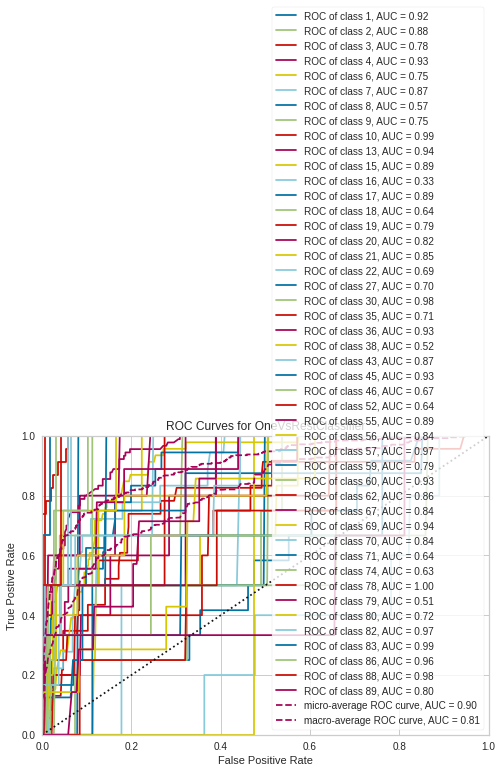

In [56]:
# モデル性能を描画
plot_model(tuned_rf)

In [0]:
# モデルをpickle化して出力
import pickle
with open('catboost_model.pkl', 'wb') as f:
 pickle.dump(tuned_rf, f)